<font size = 5>**LAB 11 PART 2**</font>

2) Logistic regression. Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [61]:
df = pd.read_csv("Logistic_regression_ls.csv")

#Get the features
x = np.array(df[["x1","x2"]])
x = x.T
#Add the x0 feature 
ones = np.ones(500)
x = np.concatenate(([ones],x),axis = 0)

#Target
y = np.array(df["label"])
y = y.reshape((1,500))


In [62]:


#Found the loss and gradient as done in lectures
def loss_log(w,x,y):
    m = x.shape[0]
    
    sig_arr = sigmoid(w@x)
    losses = -y*np.log(sig_arr)-(1-y)*np.log(1-sig_arr)
    
    return np.sum(losses)/(2*m)

def grad_log(w,x,y):
    pred = sigmoid(w@x)
    m = x.shape[0]
    return ((pred-y)@x.T)/m
    
class log_reg:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def gradient_descent(self,num_iter,alpha):
        losses = []
        n = self.x.shape[0]
        m = self.x.shape[1]
        w = np.random.rand(1,n) #initially set random weights 
        for i in range(0,num_iter):
            losses.append(loss_log(w,self.x,self.y))
            grad = grad_log(w,self.x,self.y)
            w = w - grad*alpha
        return w,losses
    
    

Text(0, 0.5, 'loss')

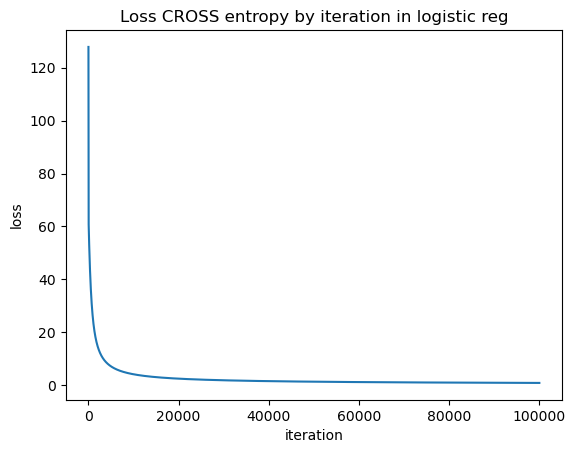

In [63]:

#Cross entropy loss versus iterations

model = log_reg(x,y)
weights,losses = model.gradient_descent(100000,0.0001)

plt.plot(losses)
plt.title("Loss CROSS entropy by iteration in logistic reg")
plt.xlabel("iteration")
plt.ylabel("loss")


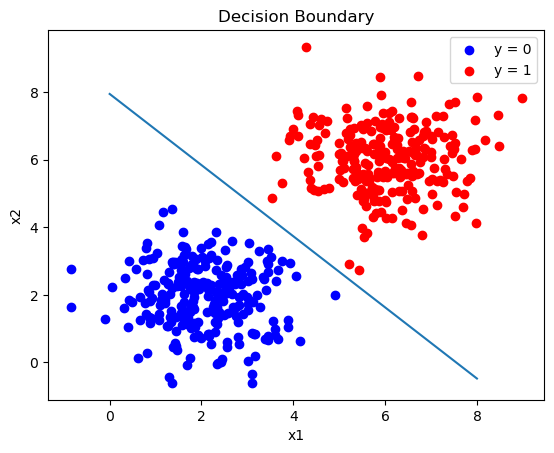

In [64]:

df1 = df[df["label"] == 0]
df2 = df[df["label"] == 1]

#Plot the points x1 versus x2
plt.scatter(np.array(df1["x1"]),np.array(df1["x2"]),color = "blue",label = "y = 0")
plt.scatter(np.array(df2["x1"]),np.array(df2["x2"]),color = "red",label = "y = 1")
plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()



#Plotting the boundary now
# w0 + w1x1 + w2x2 = 0
# x2 = -w1/w2 x1 - w0 /w2

m = -weights[0][1]/weights[0][2]
c = -weights[0][0]/weights[0][2]
linex = np.linspace(0,8,100)
liney = linex*m + c
plt.plot(linex,liney)
